# Sequencing Modeling

> In this post, it will cover various network architectures and layers that we can use to make predictions from sequence data. This is the summary of lecture "Customizing your model with Tensorflow 2" from Coursera.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Deep_Learning, Tensorflow]
- image: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

plt.rcParams['figure.figsize'] = (16, 10)

## Preprocessing sequence data

### Example

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

test_data = [
    [4, 12, 33, 18],
    [63, 23, 54, 30, 19, 3],
    [43, 37, 11, 33, 15]
]

preprocessed_data = pad_sequences(test_data, padding='pre')
preprocessed_data

array([[ 0,  0,  4, 12, 33, 18],
       [63, 23, 54, 30, 19,  3],
       [ 0, 43, 37, 11, 33, 15]])

#### post padding

In [7]:
preprocessed_data = pad_sequences(test_data, padding='post')
preprocessed_data

array([[ 4, 12, 33, 18,  0,  0],
       [63, 23, 54, 30, 19,  3],
       [43, 37, 11, 33, 15,  0]])

#### Post padding with maximum length

In [4]:
preprocessed_data = pad_sequences(test_data, padding='post', maxlen=5)
preprocessed_data

array([[ 4, 12, 33, 18,  0],
       [23, 54, 30, 19,  3],
       [43, 37, 11, 33, 15]])

#### Post padding with truncating (Default: 'pre')

In [5]:
preprocessed_data = pad_sequences(test_data, padding='post', maxlen=5, truncating='post')
preprocessed_data

array([[ 4, 12, 33, 18,  0],
       [63, 23, 54, 30, 19],
       [43, 37, 11, 33, 15]])

#### Post padding with truncating, then filled with value

In [6]:
preprocessed_data = pad_sequences(test_data, padding='post', maxlen=5, truncating='post', value=-1)
preprocessed_data

array([[ 4, 12, 33, 18, -1],
       [63, 23, 54, 30, 19],
       [43, 37, 11, 33, 15]])

#### Example in 2d array sequence

In [8]:
test_input = [
    [[2, 1], [3, 3]],
    [[4, 3], [2, 4], [1, 1]]
]

preprocessed_data = pad_sequences(test_input, padding='post')
preprocessed_data

array([[[2, 1],
        [3, 3],
        [0, 0]],

       [[4, 3],
        [2, 4],
        [1, 1]]])

#### Masking Layer for mask specific sequence

In [9]:
from tensorflow.keras.layers import Masking

preprocessed_data = pad_sequences(test_data, padding='post')

masking_layer = Masking(mask_value=0)
preprocessed_data = preprocessed_data[..., tf.newaxis] # (batch_size, seq_length, features)
masked_input = masking_layer(preprocessed_data)
masked_input

<tf.Tensor: shape=(3, 6, 1), dtype=int32, numpy=
array([[[ 4],
        [12],
        [33],
        [18],
        [ 0],
        [ 0]],

       [[63],
        [23],
        [54],
        [30],
        [19],
        [ 3]],

       [[43],
        [37],
        [11],
        [33],
        [15],
        [ 0]]])>

In [10]:
masked_input._keras_mask

<tf.Tensor: shape=(3, 6), dtype=bool, numpy=
array([[ True,  True,  True,  True, False, False],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True, False]])>

## The IMDB dataset

### Load the IMDB review sentiment dataset

In [11]:
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data()

### Inspect the dataset

In [12]:
type(X_train)

numpy.ndarray

In [13]:
print(X_train.shape, X_test.shape)

(25000,) (25000,)


In [14]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [15]:
y_train[0]

1

### Load dataset with different options

In [16]:
# Limit the vocabulary to the top 500 words using num_words
imdb.load_data(num_words=500)

((array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 

In [18]:
# Ignore the top 10 most frequent words
imdb.load_data(skip_top=10, num_words=1000)

((array([list([2, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2, 19, 14, 22, 2, 2, 2, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 2, 22, 17, 515, 17, 12, 16, 626, 18, 2, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2, 2, 16, 480, 66, 2, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 2, 2, 2, 107, 117, 2, 15, 256, 2, 2, 2, 2, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 2, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2, 56, 26, 141, 2, 194, 2, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 2, 88, 12, 16, 283, 2, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([2, 194, 2, 194, 2, 78, 228, 2, 2, 2, 2, 2, 134, 26, 2, 715, 2, 118, 2, 14, 394, 20, 13, 119, 954, 

In [19]:
imdb.load_data(maxlen=500)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [20]:
# Use '1' as the character that indicates the start of a sequence
imdb.load_data(start_char=1)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

### Explore the dataset word index

In [21]:
imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [22]:
# View the word index as a dictionary
# Accounting for index_from
index_from = 3
test = {key: value + index_from for key, value in imdb_word_index.items()}

In [23]:
test

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [25]:
test['simpsonian']

52256

In [26]:
test['the']

4

In [27]:
# View an input sentence
inv_imdb_word_index = {value: key for key, value in test.items()}
[inv_imdb_word_index[index] for index in X_train[0] if index > index_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [29]:
y_train[0]

1

## Padding and masking sequence data - Coding tutorial

### Preprocess the data with padding

In [30]:
X_train.shape

(25000,)

In [42]:
# Pad the inputs to the maximum length using maxlen
padded_X_train = pad_sequences(X_train, maxlen=300, padding='post', truncating='pre')
padded_X_train.shape

(25000, 300)

### Create a Masking layer

In [43]:
## Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_X_train = tf.expand_dims(padded_X_train, -1)
padded_X_train = tf.cast(padded_X_train, 'float32')
padded_X_train.shape

TensorShape([25000, 300, 1])

Or you can expand it with `np.expand_dims` then, convert it to tensor with `tf.convert_to_tensor()`

```python
padded_X_train = np.expand_dims(padded_X_train, -1)
tf_X_train = tf.convert_to_tensor(padded_X_train, dtype='float32')
```

In [44]:
# Create a masking layer
masking_layer = Masking(mask_value=0.0)

In [45]:
# Pass padded_X_train to it
masked_X_train = masking_layer(padded_X_train)

In [47]:
padded_X_train

<tf.Tensor: shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [48]:
masked_X_train

<tf.Tensor: shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [50]:
padded_X_train._keras_mask

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute '_keras_mask'

In [49]:
masked_X_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

## Tokenizing Text Data

In this section, you will learn how to tokenise text data using `tf.keras.preprocessing.text.Tokenizer`.

### The text dataset

The text we will work with in this notebook is Three Men in a Boat by Jerome K. Jerome, a comical short story about the perils of going outside.

In [142]:
# Load the data
with open('./dataset/ThreeMenInABoat.txt', 'r', encoding='utf-8') as f:
    text_string = f.read().replace('\n', ' ')

In [143]:
# Perform some simple preprocessing, replacing dashes with empty spaces
text_string = text_string.replace('—', '')

In [144]:
text_string[:2001]

'CHAPTER I.   Three invalids.Sufferings of George and Harris.A victim to one hundred and seven fatal maladies.Useful prescriptions.Cure for liver complaint in children.We agree that we are overworked, and need rest.A week on the rolling deep?George suggests the River.Montmorency lodges an objection.Original motion carried by majority of three to one.  There were four of usGeorge, and William Samuel Harris, and myself, and Montmorency.  We were sitting in my room, smoking, and talking about how bad we werebad from a medical point of view I mean, of course.  We were all feeling seedy, and we were getting quite nervous about it. Harris said he felt such extraordinary fits of giddiness come over him at times, that he hardly knew what he was doing; and then George said that _he_ had fits of giddiness too, and hardly knew what _he_ was doing. With me, it was my liver that was out of order.  I knew it was my liver that was out of order, because I had just been reading a patent liver-pill circ

In [145]:
# Split the text into sentences
sentence_strings = text_string.split('.')
sentence_strings[20:30]

['  I got down the book, and read all I came to read; and then, in an unthinking moment, I idly turned the leaves, and began to indolently study diseases, generally',
 '  I forget which was the first distemper I plunged intosome fearful, devastating scourge, I knowand, before I had glanced half down the list of “premonitory symptoms,” it was borne in upon me that I had fairly got it',
 '  I sat for awhile, frozen with horror; and then, in the listlessness of despair, I again turned over the pages',
 '  I came to typhoid feverread the symptomsdiscovered that I had typhoid fever, must have had it for months without knowing itwondered what else I had got; turned up St',
 ' Vitus’s Dancefound, as I expected, that I had that too,began to get interested in my case, and determined to sift it to the bottom, and so started alphabeticallyread up ague, and learnt that I was sickening for it, and that the acute stage would commence in about another fortnight',
 '  Bright’s disease, I was relieved 

### Create a Tokenizer object

The `Tokenizer` object allows you to easily tokenise words or characters from a text document. It has several options to allow you to adjust the tokenisation process. Documentation is available for the `Tokenizer` [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer).

In [146]:
# Define any additional characters that we want to filter out (ignore) from the text
additional_filters = '—’‘“”'

The Tokenizer has a `filters` keyword argument, that determines which characters will be filtered out from the text. The cell below shows the default characters that are filtered, to which we are adding our additional filters.

In [147]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' + additional_filters,
    lower=True,
    split=' ',
    char_level=False,
    oov_token='<UNK>',
    document_count=0
)

In all, the `Tokenizer` has the following keyword arguments:

`num_words`: int. the maximum number of words to keep, based on word frequency. Only the most common `num_words-1` words will be kept. If set to `None`, all words are kept.
    
`filters`: str. Each element is a character that will be filtered from the texts. Defaults to all punctuation (inc. tabs and line breaks), except `'`.

`lower`: bool. Whether to convert the texts to lowercase. Defaults to `True`.

`split`: str. Separator for word splitting. Defaults to `' '`.
    
`char_level`: bool. if True, every character will be treated as a token. Defaults to `False`.

`oov_token`: if given, it will be added to word_index and used to replace out-of-vocabulary words during sequence_to_text calls. Defaults to `None`.

### Fit the Tokenizer to the text

We can now tokenize our text using the `fit_on_texts` method. This method takes a list of strings to tokenize, as we have prepared with `sentence_strings`.

In [148]:
# Build the Tokenizer vocabulary
tokenizer.fit_on_texts(sentence_strings)

The `fit_on_texts` method could also take a list of lists of strings, and in this case it would recognise each element of each sublist as an individual token.

### Get the Tokenizer configuration

Now that the Tokenizer has ingested the data, we can see what it has extracted from the text by viewing its configuration.

In [149]:
# Get the tokenizer config as a python dict
tokenizer_config = tokenizer.get_config()
tokenizer_config.keys()

dict_keys(['num_words', 'filters', 'lower', 'split', 'char_level', 'oov_token', 'document_count', 'word_counts', 'word_docs', 'index_docs', 'index_word', 'word_index'])

In [150]:
tokenizer_config['word_counts'][:500]

'{"chapter": 19, "i": 1195, "three": 79, "invalids": 1, "sufferings": 2, "of": 1487, "george": 306, "and": 3375, "harris": 314, "a": 1696, "victim": 3, "to": 1785, "one": 241, "hundred": 19, "seven": 15, "fatal": 1, "maladies": 2, "useful": 2, "prescriptions": 1, "cure": 1, "for": 525, "liver": 8, "complaint": 2, "in": 976, "children": 13, "we": 866, "agree": 2, "that": 944, "are": 181, "overworked": 1, "need": 7, "rest": 14, "week": 19, "on": 501, "the": 3603, "rolling": 1, "deep": 18, "suggests'

The above is the number of times each word appears in the corpus. As you can see, the word counts dictionaries in the config are serialized into plain JSON. The `loads()` method in the Python library `json` can be used to convert this JSON string into a dictionary.

In [151]:
import json

word_counts = json.loads(tokenizer_config['word_counts'])

The word index is derived from the `word_counts`. 

In [152]:
tokenizer_config['word_index'][:500]

'{"<UNK>": 1, "the": 2, "and": 3, "to": 4, "a": 5, "of": 6, "it": 7, "i": 8, "in": 9, "that": 10, "he": 11, "we": 12, "was": 13, "you": 14, "had": 15, "for": 16, "at": 17, "on": 18, "with": 19, "up": 20, "they": 21, "is": 22, "as": 23, "not": 24, "his": 25, "said": 26, "but": 27, "would": 28, "all": 29, "s": 30, "have": 31, "him": 32, "there": 33, "be": 34, "harris": 35, "george": 36, "out": 37, "t": 38, "so": 39, "then": 40, "when": 41, "them": 42, "one": 43, "were": 44, "about": 45, "us": 46, "'

In [153]:
index_word = json.loads(tokenizer_config['index_word'])
word_index = json.loads(tokenizer_config['word_index'])

### Map the sentences to tokens

You can map each sentence to a sequence of integer tokens using the Tokenizer's `texts_to_sequences()` method. As was the case for the IMDb data set, the number corresponding to a word is that word's frequency rank in the corpus.

In [154]:
sentence_strings[:5]

['CHAPTER I',
 '   Three invalids',
 'Sufferings of George and Harris',
 'A victim to one hundred and seven fatal maladies',
 'Useful prescriptions']

In [155]:
# Tokenize the data
sentence_seq = tokenizer.texts_to_sequences(sentence_strings)
type(sentence_seq)

list

In [156]:
sentence_seq[:5]

[[362, 8],
 [126, 3362],
 [2319, 6, 36, 3, 35],
 [5, 1779, 4, 43, 363, 3, 468, 3363, 2320],
 [2321, 3364]]

In [157]:
print(word_index['chapter'], word_index['i'])
print(word_index['three'], word_index['invalids'])
print(word_index['sufferings'], word_index['of'], word_index['george'], word_index['and'], word_index['harris'])
print(word_index['a'], word_index['victim'], word_index['to'], word_index['one'], word_index['hundred'], word_index['and'], word_index['seven'], word_index['fatal'], word_index['maladies'])
print(word_index['useful'], word_index['prescriptions'])

362 8
126 3362
2319 6 36 3 35
5 1779 4 43 363 3 468 3363 2320
2321 3364


### Map the tokens to sentences

You can map the tokens back to sentences using the Tokenizer's `sequences_to_texts` method.

In [158]:
sentence_seq[:5]

[[362, 8],
 [126, 3362],
 [2319, 6, 36, 3, 35],
 [5, 1779, 4, 43, 363, 3, 468, 3363, 2320],
 [2321, 3364]]

In [159]:
# Map the token sequences back to sentences
tokenizer.sequences_to_texts(sentence_seq)[:5]

['chapter i',
 'three invalids',
 'sufferings of george and harris',
 'a victim to one hundred and seven fatal maladies',
 'useful prescriptions']

In [160]:
# Verify the mappings in the config
print(index_word['362'], index_word['8'])
print(index_word['126'], index_word['3362'])
print(index_word['2319'], index_word['6'], index_word['36'], index_word['3'], index_word['35'])
print(index_word['5'], index_word['1779'], index_word['4'], index_word['43'], index_word['363'], index_word['3'], index_word['468'], index_word['3363'], index_word['2320'])
print(index_word['2321'], index_word['3364'])

chapter i
three invalids
sufferings of george and harris
a victim to one hundred and seven fatal maladies
useful prescriptions


In [161]:
# Any valida sequence of tokens can be converted to text
tokenizer.sequences_to_texts([[92, 104, 241], [152, 169, 53, 2491]])

['good day world', 'montmorency bit my finger']

If a word is not featured in the Tokenizer's word index, then it will be mapped to the value of the Tokenizer's `oov_token` property. 

In [162]:
# Tokenize unrecognized words
tokenizer.texts_to_sequences(['i would like goobleydoobly hobbledyho'])

[[8, 28, 78, 1, 1]]

In [163]:
# Verify the OOV token
index_word['1']

'<UNK>'

### Further reading and resources

* https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
* https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html

## The Embedding Layer

### Example

In [188]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(input_dim=1000, output_dim=32, input_length=64, mask_zero=True)
test_input = np.random.randint(1000, size=(16, 64))

embedded_inputs = embedding_layer(test_input)

In [189]:
# (batch_size, sequence, embedding_dim)
embedded_inputs.shape

TensorShape([16, 64, 32])

In [190]:
embedded_inputs

<tf.Tensor: shape=(16, 64, 32), dtype=float32, numpy=
array([[[ 9.65585560e-03,  2.58246697e-02,  2.83139236e-02, ...,
         -1.97027810e-02,  3.73625793e-02,  4.66074981e-02],
        [-1.10767260e-02,  3.09304632e-02,  4.11251448e-02, ...,
          1.56247951e-02, -4.29970883e-02,  5.83509356e-03],
        [ 4.95434292e-02, -2.65830886e-02, -4.69835997e-02, ...,
         -5.20426035e-03,  7.71843269e-03, -1.17018335e-02],
        ...,
        [ 2.30224021e-02, -4.08567786e-02, -4.64139953e-02, ...,
         -4.46658731e-02,  3.18944491e-02, -1.09856352e-02],
        [ 6.47538900e-03, -3.03988699e-02,  1.80933625e-03, ...,
          4.66918387e-02, -4.85729575e-02,  1.82619952e-02],
        [-3.77286784e-02, -1.58771984e-02, -4.74475622e-02, ...,
         -1.06220357e-02,  3.23696993e-02, -4.96266745e-02]],

       [[ 4.84966673e-02,  1.99735165e-04, -9.31495428e-03, ...,
         -2.26535555e-02, -3.86798605e-02, -2.29130033e-02],
        [-4.50625792e-02, -5.56951761e-03,  1.377

In [191]:
embedded_inputs._keras_mask

<tf.Tensor: shape=(16, 64), dtype=bool, numpy=
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])>

### Coding Tutorial

### Create and apply an Embedding layer

In [192]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length
embedding_layer = Embedding(input_dim=501, output_dim=16, )

In [193]:
# Inspect an Embedding layer output for a fixed input
sequence_of_indices = tf.constant([[[0], [1], [5], [500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.01727618,  0.03089762,  0.002029  ,  0.02660182,
           0.03315575, -0.0158009 , -0.04145148, -0.01046788,
          -0.00868522, -0.01087832,  0.03910741,  0.01844318,
           0.00452308, -0.00712603, -0.04908859, -0.03017252]],

        [[-0.01455295, -0.01239837,  0.04571614, -0.01083236,
           0.0072578 , -0.00458877,  0.03554687, -0.01132578,
          -0.03172002, -0.04165415,  0.04840617,  0.03732756,
          -0.03718423, -0.02182792,  0.02609112,  0.03805694]],

        [[-0.00051304,  0.04867173, -0.00368887,  0.04377763,
          -0.01178855, -0.01280548, -0.00160016, -0.04611064,
           0.00509077, -0.02930354, -0.03712142, -0.02733033,
           0.00229036, -0.00932483, -0.02904466,  0.02423595]],

        [[ 0.02334765,  0.0198273 , -0.01104606, -0.03421359,
          -0.01847423,  0.01022577, -0.03737479, -0.03536389,
           0.03680542,  0.0358013 , -0.01858652, -0.0453972 ,
      

In [194]:
embedding_layer.get_weights()

[array([[ 0.01727618,  0.03089762,  0.002029  , ..., -0.00712603,
         -0.04908859, -0.03017252],
        [-0.01455295, -0.01239837,  0.04571614, ..., -0.02182792,
          0.02609112,  0.03805694],
        [-0.00477733,  0.01999179,  0.00787187, ..., -0.04085811,
          0.00575401, -0.04952283],
        ...,
        [-0.01691771,  0.011001  , -0.02034165, ..., -0.02855944,
          0.04151667,  0.01520164],
        [ 0.02687527,  0.01937275, -0.01556892, ..., -0.03390159,
          0.03692856,  0.02204534],
        [ 0.02334765,  0.0198273 , -0.01104606, ..., -0.04028156,
         -0.00017995,  0.04682523]], dtype=float32)]

In [195]:
# Get the embedding for the 14th index
embedding_layer.get_weights()[0][14]

array([-0.0342101 ,  0.01310667,  0.0132176 ,  0.02718227,  0.04495814,
        0.01778303,  0.01667256,  0.04202265, -0.03798028,  0.03308897,
        0.01891697, -0.03616475,  0.02652378, -0.03046833, -0.03324846,
       -0.03275827], dtype=float32)

### Create a layer that uses the mask_zero kwargs

In [196]:
masking_embdding_layer = Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [197]:
# Apply this layer to the sequence and see the _keras_mask property
masked_sequence_of_embeddings = masking_embdding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

## The Embedding Projector - Coding Tutorial

### Load and preprocess the IMDb data

In [198]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [199]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = get_and_pad_imdb_dataset()

In [200]:
# A function to get the dataset word index
def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [201]:
# Get the word index
imdb_word_index = get_imdb_word_index()

In [202]:
# Swap the keys and values of the word index
inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [203]:
[inv_imdb_word_index[index] for index in X_train[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

### Building an Embedding layer into a model

In [204]:
# Get the maximum index value
max_index_value = max(imdb_word_index.values())

In [205]:
# Specify an embedding dimension
embedding_dim = 16

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense

# Build a model using sequential
# 1. Embedding layer
# 2. GlobalAveragePooling1D
# 3. Dense

model = Sequential([
    Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    GlobalAveragePooling1D(),
    Dense(units=1, activation='sigmoid')
])

In [210]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [211]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Functional API refresher.

inputs = Input((None, ))
embedding_sequence = Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False)(inputs)
average_embedding = GlobalAveragePooling1D()(embedding_sequence)
positive_probability = Dense(1, activation='sigmoid')(average_embedding)

model = Model(inputs=inputs, outputs=positive_probability)

In [212]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_13 (Embedding)     (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


### Compile, train, and evaluate the model

In [213]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [214]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), validation_steps=20)

Epoch 1/5
782/782 [==============================] - 5s 7ms/step - loss: 0.6903 - accuracy: 0.5447 - val_loss: 0.6843 - val_accuracy: 0.6922
Epoch 2/5
782/782 [==============================] - 5s 6ms/step - loss: 0.6717 - accuracy: 0.6784 - val_loss: 0.6539 - val_accuracy: 0.6969
Epoch 3/5
782/782 [==============================] - 5s 6ms/step - loss: 0.6287 - accuracy: 0.7612 - val_loss: 0.6029 - val_accuracy: 0.7625
Epoch 4/5
782/782 [==============================] - 5s 6ms/step - loss: 0.5765 - accuracy: 0.7901 - val_loss: 0.5518 - val_accuracy: 0.7812
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 0.5270 - accuracy: 0.8179 - val_loss: 0.5079 - val_accuracy: 0.8000


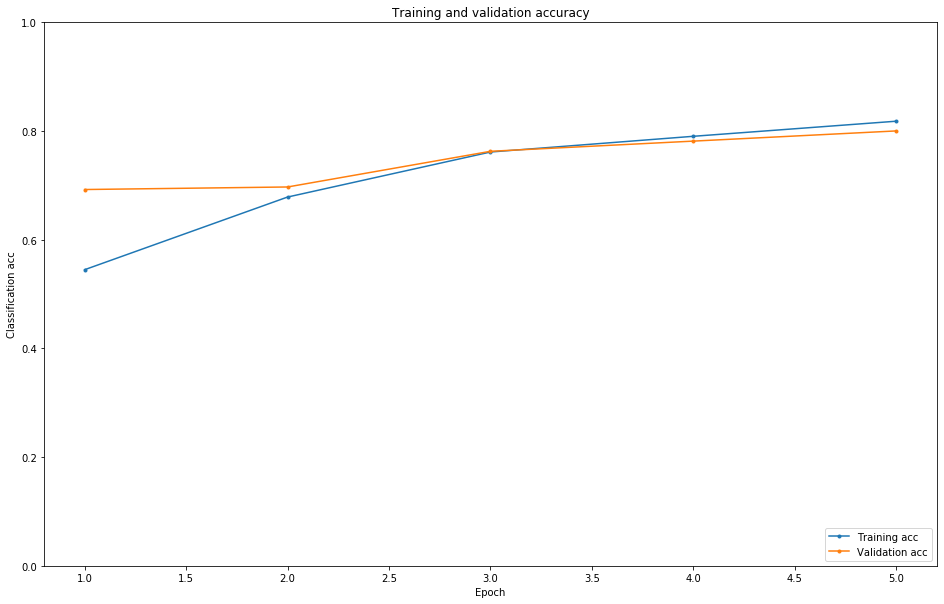

In [215]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification acc')
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.show()

### Tensorflow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [216]:
# Retrieve the embedding layer's weights from the trained model
weights = model.layers[1].get_weights()[0]

In [219]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

k = 0

for word, token in word_index.items():
    if k != 0:
        with open('meta.tsv', 'w', encoding='utf-8') as out_m:
            out_m.write('\n')
        with open('vecs.tsv', 'w', encoding='utf-8') as out_v:
            out_v.write('\n')
    
    with open('vecs.tsv', 'w', encoding='utf-8') as out_v:
        out_v.write('\t'.join([str(x) for x in weights[token]]))
    with open('meta.tsv', 'w', encoding='utf-8') as out_m:
        out_m.write(word)
    k += 1

In [221]:
from tensorboard.plugins import projector

config = projector.ProjectorConfig()
embedding_config = config.embeddings.add()

embedding_config.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding_config.metadata_path = 'meta.tsv'
projector.visualize_embeddings('.', config)

In [228]:
%load_ext tensorboard
%tensorboard --logdir .

Reusing TensorBoard on port 6006 (pid 19832), started 0:06:35 ago. (Use '!kill 19832' to kill it.)